<a href="https://colab.research.google.com/github/Myavuzars/NLP-with-Tensorflow/blob/main/Email_classification_(BERT_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report 

In [3]:
#!pip install tensorflow-text

In [4]:
import tensorflow_hub as hub
import tensorflow_text as text


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Email Classification/emails.csv")
print(df.shape)
df=df.drop(df.columns[2:110], axis=1)


(5730, 110)


In [7]:
df.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [8]:
#Dealing with missing values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

                                                   text spam
1380  Subject: from the enron india newsdesk - april...  NaN
2651  Subject: from the enron india newsdesk - april...  NaN


In [9]:
df = df.reset_index().dropna().set_index('index')

In [10]:
df.groupby('spam').describe()

text  ...     
                                                   count  ... freq
spam                                                      ...     
 its termination would not  have such a phenome...     1  ...    1
 mr suresh prabhu                                      1  ...    1
0                                                   4358  ...    2
1                                                   1368  ...    1

[4 rows x 4 columns]

In [11]:
newdf= df.loc[df['spam'].str.contains('0|1',na=False)] #OR
newdf.head(3)

,text,spam
index,,
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [12]:
newdf.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4358   4325  Subject: re : your mail  zhendong ,  dr . kami...    2
1     1368   1368  Subject: new stock : shooting stars stock repo...    1

In [13]:
newdf['spam'].value_counts()

0    4358
1    1368
Name: spam, dtype: int64

In [14]:
newdf["spam"] = newdf["spam"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test =train_test_split(newdf['text'], newdf['spam'], stratify=newdf['spam'])

In [16]:
X_train.head(4)

index
5410    Subject: pre - ranking  below is your spreadsh...
2574    Subject: research and development charges to g...
3473    Subject: credit applicatiions in grms  this no...
4063    Subject: last minute things  tff participants ...
Name: text, dtype: object

In [17]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url ="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [18]:
bert_preprocess =hub.KerasLayer(preprocess_url)
bert_encoder =hub.KerasLayer(encoder_url)

In [19]:
#Bert layers
text_input =tf.keras.layers.Input(shape=(), dtype= tf.string, name='text')
preprocessed_text=bert_preprocess(text_input)
outputs =bert_encoder(preprocessed_text)

In [20]:
#NN Layers
layer_dropout = tf.keras.layers.Dropout(0.1, name='dropout') (outputs['pooled_output'])

layer_dense = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer_dropout)

model =tf.keras.Model(inputs =[text_input], outputs=[layer_dense])



In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [22]:
METRICS =[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')]

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [24]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
135/135 [==============================] - 43s 227ms/step - loss: 0.5212 - accuracy: 0.7485 - precision: 0.3247 - recall: 0.0487
Epoch 2/10
135/135 [==============================] - 31s 227ms/step - loss: 0.4351 - accuracy: 0.7976 - precision: 0.8230 - recall: 0.1949
Epoch 3/10
135/135 [==============================] - 31s 228ms/step - loss: 0.3892 - accuracy: 0.8298 - precision: 0.8391 - recall: 0.3558
Epoch 4/10
135/135 [==============================] - 31s 227ms/step - loss: 0.3600 - accuracy: 0.8461 - precision: 0.8672 - recall: 0.4201
Epoch 5/10
135/135 [==============================] - 31s 227ms/step - loss: 0.3347 - accuracy: 0.8652 - precision: 0.8444 - recall: 0.5341
Epoch 6/10
135/135 [==============================] - 31s 228ms/step - loss: 0.3133 - accuracy: 0.8668 - precision: 0.8482 - recall: 0.5390
Epoch 7/10
135/135 [==============================] - 31s 227ms/step - loss: 0.2951 - accuracy: 0.8766 - precision: 0.8658 - recall: 0.5721
Epoch 8/10
135/135 [

In [25]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 11s 228ms/step - loss: 0.2722 - accuracy: 0.8973 - precision: 0.7893 - recall: 0.7778


[0.27222320437431335,
 0.8973463773727417,
 0.7893174886703491,
 0.7777777910232544]

In [26]:
y_predicted = model.predict(X_test)
y_preedicted = y_predicted.flatten()

In [27]:
y_predicted = np.where((y_predicted) > 0.5, 1 , 0)
y_predicted

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [28]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1019,   71],
       [  76,  266]])

Text(33.0, 0.5, 'Truth')

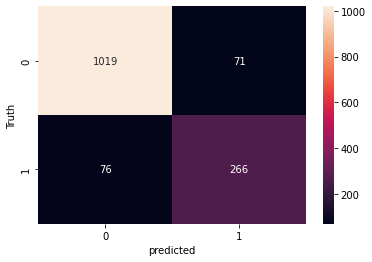

In [29]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1090
           1       0.79      0.78      0.78       342

    accuracy                           0.90      1432
   macro avg       0.86      0.86      0.86      1432
weighted avg       0.90      0.90      0.90      1432



In [31]:
#Cheking an email from my spam folders 
mail1 = ['Having wild-caught seafood delivered to you allows you to Save Time. Your seafood will arrive in frozen, ready-to-go sealed portions. Plus you’ll be given access to free recipes online.Eat Healthier.Wild-caught seafood is natural and some of the most nutritionally dense food out there, never having been farmed or genetically modified.Taste the quality.']
mail2=['Trainers,Success! A part of the mysterious door located at the historical cave site has been unlocked! The rumbling caused by the movement of the door’s locking mechanism disturbed the Pokémon living within the cave—and with them appeared Druddigon, a Pokémon never before seen in Pokémon GO! Druddigon is a Dragon-type Pokémon that dwells within the Unova region’s Dragonspiral Tower.']


In [32]:
model.predict(mail1)

array([[0.9182503]], dtype=float32)

In [33]:
model.predict(mail2)

array([[0.9375432]], dtype=float32)

In [34]:
#Cheking an email from inbox folder
mail3=['Are you still interested in lessons for your daughter? I now have a Beginner class at 4pm on Tuesdays. Tomorrow, Nov 29, there is a "Basic Intro to Archery" class at the 4pm time.Another "Intro" class is scheduled at 6:45-8pm on Thursday Dec 2. Hope she can be at one of them. She needs to attend one prior to her first group lesson. Cost is $18, cash or check.Please let me know. ']

In [35]:
model.predict(mail3)

array([[0.22957832]], dtype=float32)

In [ ]:
#Looks like our model working well.